In [1]:
# Author: Alexander Maksiaev
# Purpose: Analyze results from sentiment analysis -- this time from SentiWords module

In [2]:
# Housekeeping: Importing libraries, switching directories, etc.

import os
import pandas as pd
import csv 
import numpy as np
from statistics import mean
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import docx
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as mc

os.getcwd()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

sns.set_palette("viridis")

In [3]:
# Getting the data frame

results_clean = []
df = pd.read_csv("sentiments_sentiwords_3_15_2024_autism.csv", low_memory=False)
print(df)
df = df.sort_values("Textbook")

print(df)

                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404
217     Spcl_Vaughn_07_Autism.docx  0.046428

[218 rows x 2 columns]
                          Textbook     Score
0     Abn_Barlow_04_Autism_v2.docx -0.016145
1     Abn_Barlow_05_Autism_v2.docx  0.002431
2     Abn_Barlow_06_Autism_v2.docx  0.004942
3        Abn_Barlow_07_Autism.docx  0.000952
4        Abn_Barlow_08_Autism.docx -0.022443
..                             ...       ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072
215  Spcl_Vaughn_05_Autism_v2.d

,Mean,Standard Deviation
Field,,
Abn,-0.008513,0.025673
Devo,-0.034936,0.083266
GS,0.141285,0.112557
HS,0.063795,0.100016
Intro,-0.028040,0.086075
Neuro,0.001626,0.040399
Socl,-0.032330,0.120343
Spcl,0.021207,0.026825


F_onewayResult(statistic=6.66724187976645, pvalue=3.921803922048191e-07)


group1,group2,meandiff,p-adj,lower,upper,reject
Abn,Devo,-0.0264,0.5817,-0.07,0.0171,False
Abn,GS,0.1498,0.0032,0.0323,0.2673,True
Abn,HS,0.0723,0.1092,-0.0077,0.1523,False
Abn,Intro,-0.0195,0.8964,-0.0654,0.0263,False
Abn,Neuro,0.0101,0.9977,-0.0361,0.0564,False
Abn,Socl,-0.0238,0.9178,-0.0825,0.0348,False
Abn,Spcl,0.0297,0.3282,-0.0108,0.0702,False
Devo,GS,0.1762,0.0002,0.0578,0.2946,True
Devo,HS,0.0987,0.0062,0.0174,0.18,True
Devo,Intro,0.0069,0.9999,-0.0411,0.0549,False


                          Textbook     Score  Author Field
0     Abn_Barlow_04_Autism_v2.docx -0.016145  Barlow   Abn
1     Abn_Barlow_05_Autism_v2.docx  0.002431  Barlow   Abn
2     Abn_Barlow_06_Autism_v2.docx  0.004942  Barlow   Abn
3        Abn_Barlow_07_Autism.docx  0.000952  Barlow   Abn
4        Abn_Barlow_08_Autism.docx -0.022443  Barlow   Abn
..                             ...       ...     ...   ...
213  Spcl_Vaughn_03_Autism_v2.docx -0.026835  Vaughn  Spcl
214  Spcl_Vaughn_04_Autism_v2.docx  0.063072  Vaughn  Spcl
215  Spcl_Vaughn_05_Autism_v2.docx  0.060376  Vaughn  Spcl
216  Spcl_Vaughn_06_Autism_v2.docx  0.063404  Vaughn  Spcl
217     Spcl_Vaughn_07_Autism.docx  0.046428  Vaughn  Spcl

[218 rows x 4 columns]


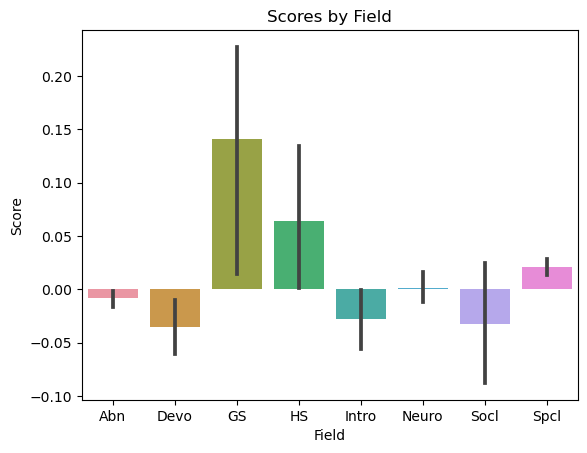

In [4]:
# Field Analysis

# Break up the data frame into fields

field_df = df

all_fields = []

fields_regex = ["Abn.*", "Devo.*", "Intro.*", "Neuro.*", "Socl.*", "Spcl.*", "GS.*", "HS.*"]

authors = ["Barlow", "Brown", "Comer", "Hooley", "Kearney", "Mash", "Nevid", "Nolen-Hoeksema", "Sue", 
                 "Whitbourne", "Berger", "Berk", "Bornstein", "Feldman", "Kail", "Miller", "Devo_Newman", "Santrock", 
                 "Sigelman", "Bernstein", "Coon", "Griggs", "Intro_Kalat", "Morris", "Intro_Myers", "Rathus", "Wade", "Weiten", 
                 "Bear", "Breedlove", "Carlson", "Garrett", "Johnson", "Neuro_Kalat", "Kolb", "Pinel", "Reisberg", "Aronson", 
                 "Baumeister", "Branscombe", "Gilovich", "Gruman", "Socl_Myers", "Rogers", "Zastrow", "Friend", "Gargiulo", "Hardman", 
                 "Heward", "Kuder", "Lewis", "Overton", "Smith", "Turnbull", "Vaughn", 
                 "GS_Newman", "Rothenberg", "Wood", "Carroll", "Crooks", "Hyde", "LeVay", "Yarber"]


for field in fields_regex:
    field_l = field_df[field_df["Textbook"].str.contains(field, regex=True)]
    all_fields.append(field_l)
    

# Find average score per field

field_means = []
field_names = []
author_names = []
                
for textbook in range(len(field_df)):
    if len(field_df[field_df["Textbook"].str.contains("^.+_", regex=True)]) > 0:
        chunk = field_df["Textbook"].iloc[textbook]
        field = chunk.split("_")[0]
        author = chunk.split("_")[1]
        field_names.append(field)
        author_names.append(author)
    
field_df["Author"] = author_names
field_df["Field"] = field_names

# mean = field_df.groupby('Field')['Score'].mean()
# std = field_df.groupby('Field')['Score'].std()

# Find means

field_intermediary_df = field_df[["Score", "Field"]]
field_means_df = field_intermediary_df.groupby(["Field"]).mean()
field_means_df = field_means_df.rename(columns={"Score":"Mean"})
field_stdev_df = field_intermediary_df.groupby(["Field"]).std()
field_stdev_df = field_stdev_df.rename(columns={"Score":"Standard Deviation"})


field_stats_df = pd.concat([field_means_df, field_stdev_df], axis="columns")

display(field_stats_df)

# Do ANOVA

# print(field_df[field_df['Field'] == 'Devo']["Score"])

anova = f_oneway(field_df[field_df['Field'] == 'Abn']["Score"], field_df[field_df['Field'] == 'Devo']['Score'],
        field_df[field_df['Field'] == 'GS']['Score'], field_df[field_df['Field'] == 'HS']['Score'],
        field_df[field_df['Field'] == 'Intro']['Score'], field_df[field_df['Field'] == 'Neuro']['Score'], 
        field_df[field_df['Field'] == 'Socl']['Score'], field_df[field_df['Field'] == 'Spcl']['Score'])

print(anova)

# Post-hoc testing

comp = mc.MultiComparison(df['Score'], df['Field'])
post_hoc_res = comp.tukeyhsd()
display(post_hoc_res.summary())

# Graphing

fig, ax = plt.subplots()

print(field_df)

field_df.to_csv('field_df_sentiwords_autism.csv', index=True)

sns.barplot(ax = ax,
    data=field_df, x="Field", y="Score"
)
# ax.bar_label(ax.containers[0], fontsize=10);

# ax.errorbar(mean.index, mean)
ax.set_title("Scores by Field")

plt.savefig('fields_autism_sentiwords.png')

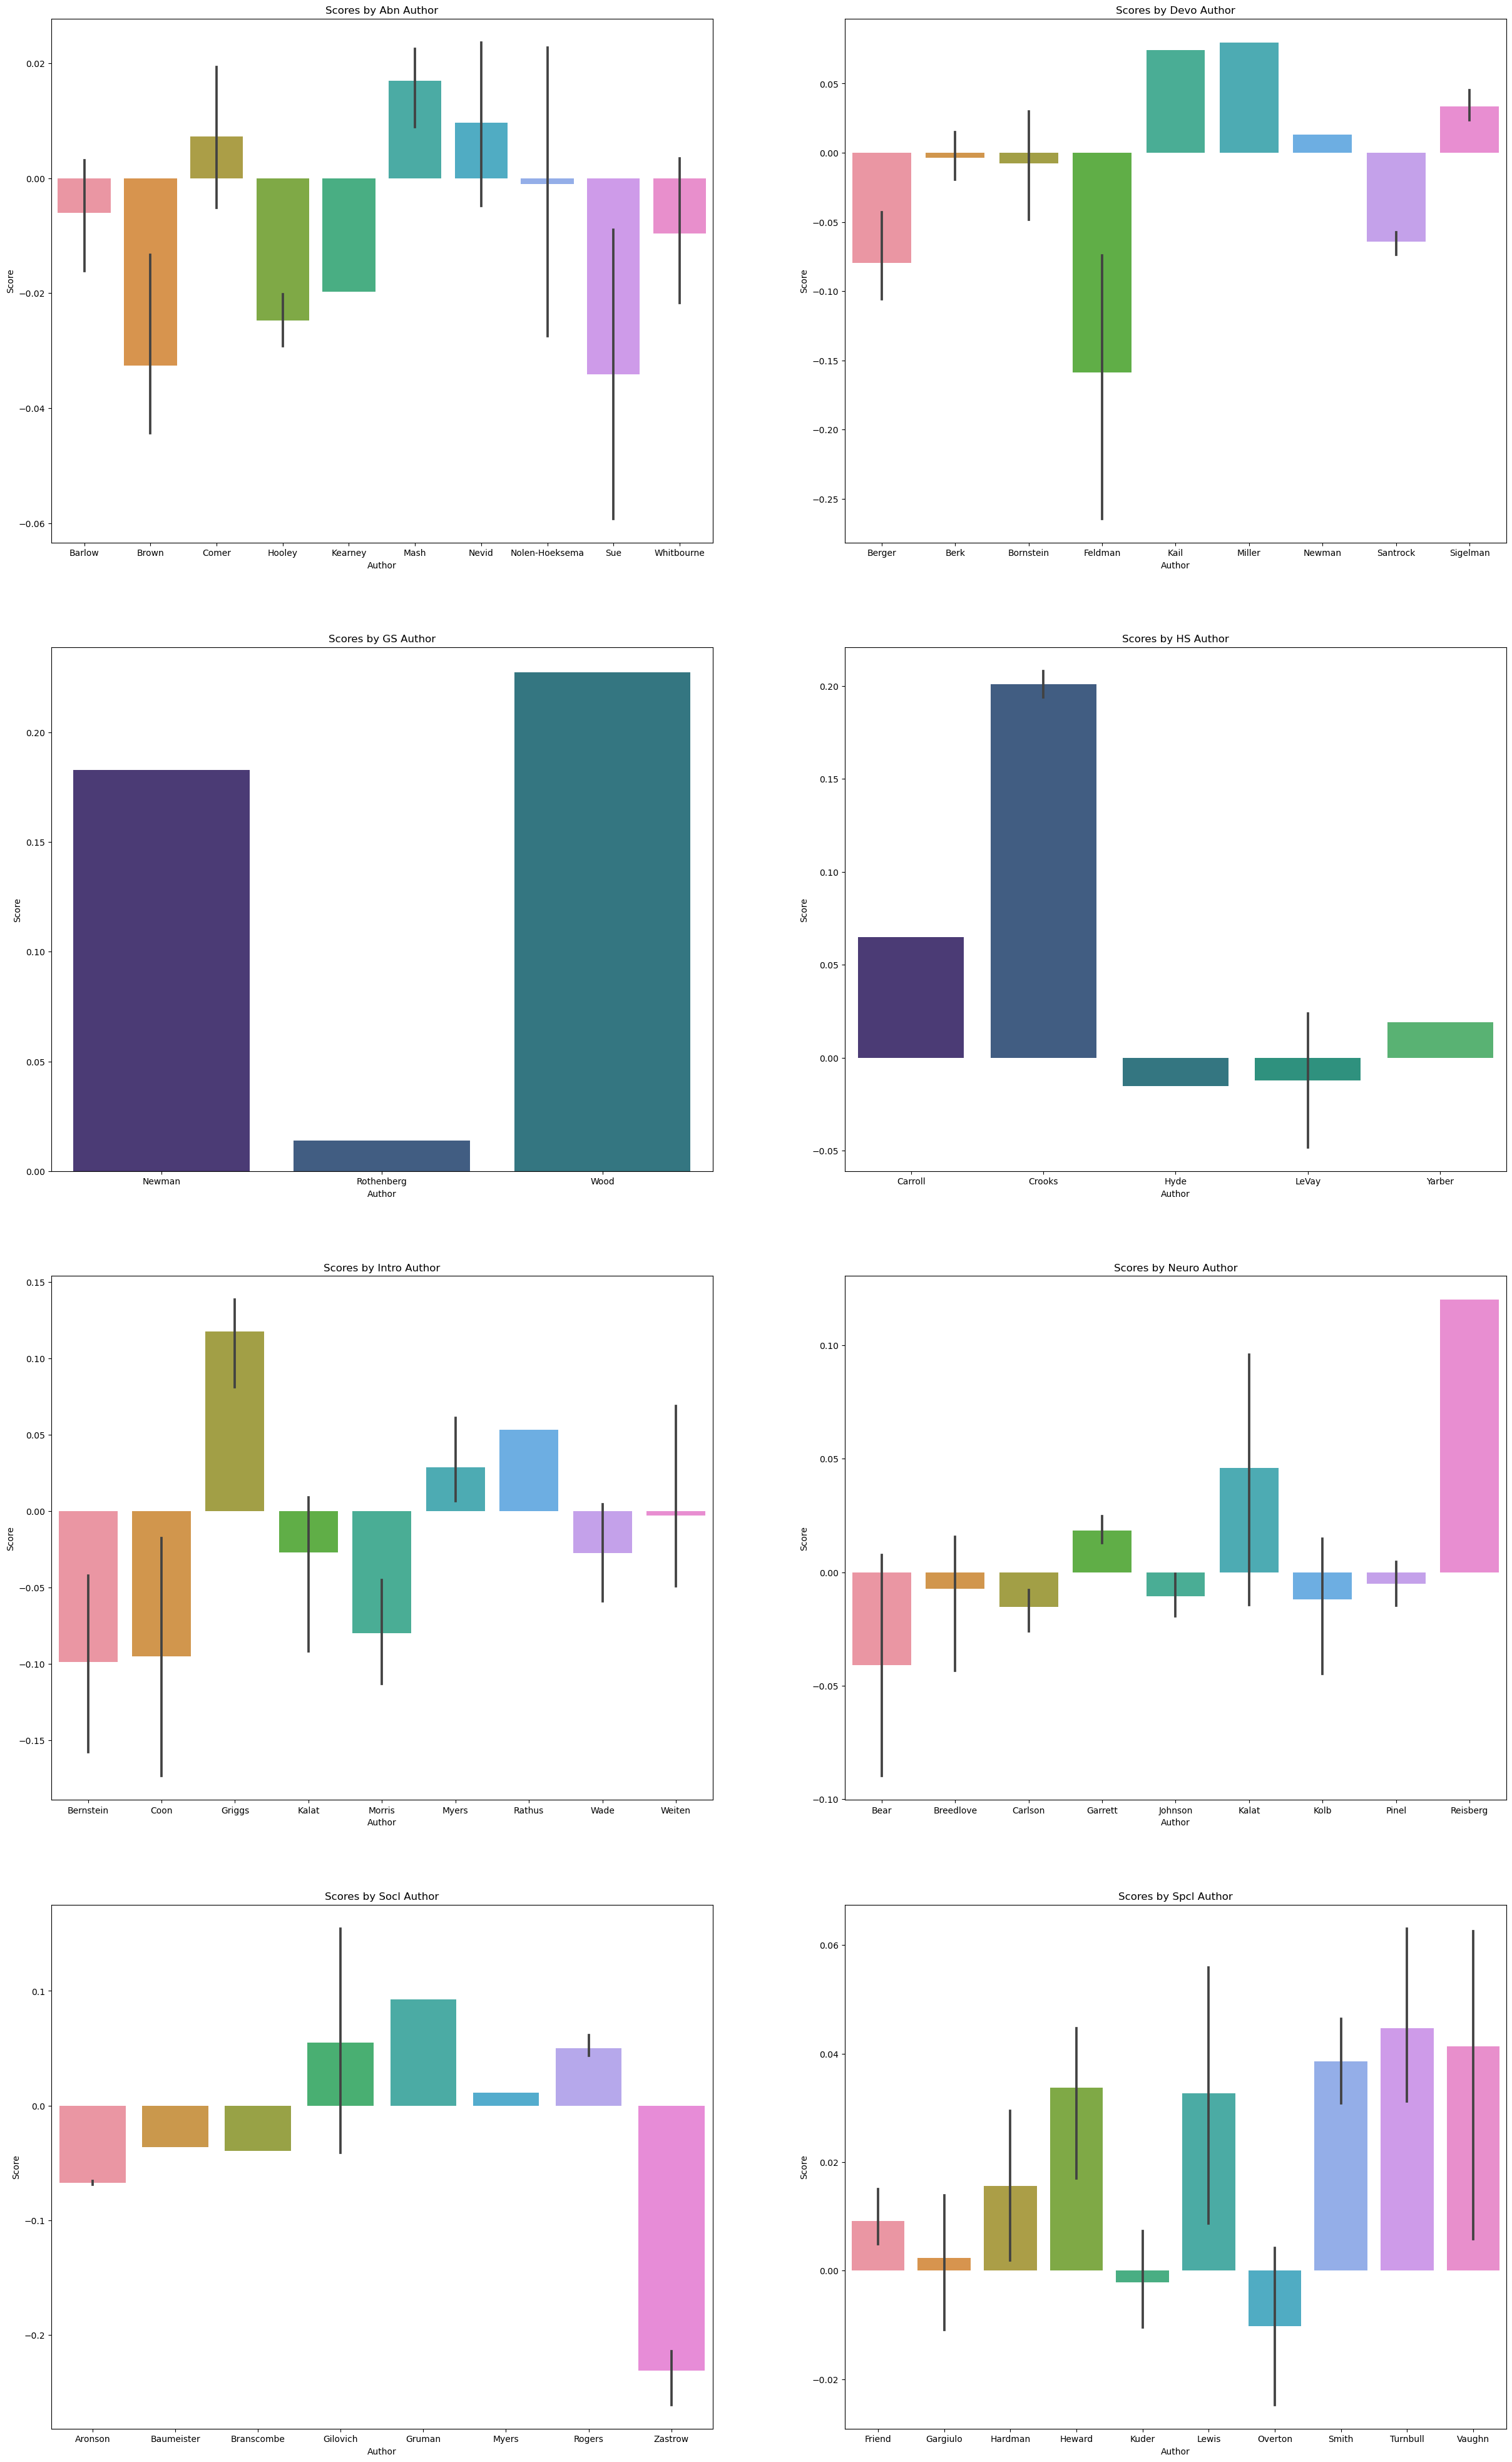

In [5]:
# Author Analysis

# Break up dataframe into authors

author_df = field_df

all_authors = []

for author in authors:
    author_l = author_df[author_df["Textbook"].str.contains(author)]
    all_authors.append(author_l)

author_means_df = author_df

fig, ax = plt.subplots(4, 2, figsize = (30,50))

sns.barplot(ax = ax[0][0],
    data=author_means_df.loc[author_means_df['Field']=='Abn'], x="Author", y="Score"
)
sns.barplot(ax = ax[0][1],
    data=author_means_df.loc[author_means_df['Field']=='Devo'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][0],
    data=author_means_df.loc[author_means_df['Field']=='GS'], x="Author", y="Score"
)
sns.barplot(ax = ax[1][1],
    data=author_means_df.loc[author_means_df['Field']=='HS'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][0],
    data=author_means_df.loc[author_means_df['Field']=='Intro'], x="Author", y="Score"
)
sns.barplot(ax = ax[2][1],
    data=author_means_df.loc[author_means_df['Field']=='Neuro'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][0],
    data=author_means_df.loc[author_means_df['Field']=='Socl'], x="Author", y="Score"
)
sns.barplot(ax = ax[3][1],
    data=author_means_df.loc[author_means_df['Field']=='Spcl'], x="Author", y="Score"
)

ax[0][0].set_title("Scores by Abn Author")
ax[0][1].set_title("Scores by Devo Author")
ax[1][0].set_title("Scores by GS Author")
ax[1][1].set_title("Scores by HS Author")

ax[2][0].set_title("Scores by Intro Author")
ax[2][1].set_title("Scores by Neuro Author")
ax[3][0].set_title("Scores by Socl Author")
ax[3][1].set_title("Scores by Spcl Author")

# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "authors_autism_" + str(counter) + "_" + str(subcounter) + "_sentiwords.png"
#         ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.20))
    counter += 1


In [6]:
# # Edition Analysis

# edition_df = df

# # Cut up dataframe into chunks by author

# all_editions = []
# author_total = []
# test = []
# slope = []
# for a_df in all_authors:
#     author_name = ""
#     alphabetical = a_df["Textbook"].str.split("_").values 
#     editions = [] # Get only the edition
#     for l in alphabetical:
#         editions.append(l[2])
#         all_editions.append(l[2])
#         author_name = l[0] + "_" + l[1]
#         author_total.append(author_name)
#     test.append(editions)
#     a_df.loc[:,"Edition"] = editions
#     a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
#     a_df = a_df.sort_values("Edition")
#     if len(a_df["Edition"]) > 0:
#         res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
#         for l in alphabetical:
#             if len(alphabetical) > 1:
#                 slope.append(res.slope)
#             else:
#                 slope.append(0)

# edition_df["Edition"] = all_editions
# edition_df["Author"] = author_total
# edition_df["Slope"] = slope
# print(edition_df)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# # Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

# high = edition_df[edition_df["Slope"] > 0.055]
# high = high.sort_values("Edition")
# sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high, sort=False)

# low = edition_df[edition_df["Slope"] <= -0.055]
# h = sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# plt.show()


C:\Users\maksi\AppData\Local\Temp\ipykernel_28984\2648880070.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_28984\2648880070.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_28984\2648880070.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

C:\Users\maksi\AppData\Local\Temp\ipykernel_28984\2648880070.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\AppData\Local\Temp\ipykernel_28984\2648880070.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df.loc[:,"Edition"] = editions
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\maksi\anaconda3\Lib\site-packages\scipy\sta

[]


<Axes: >

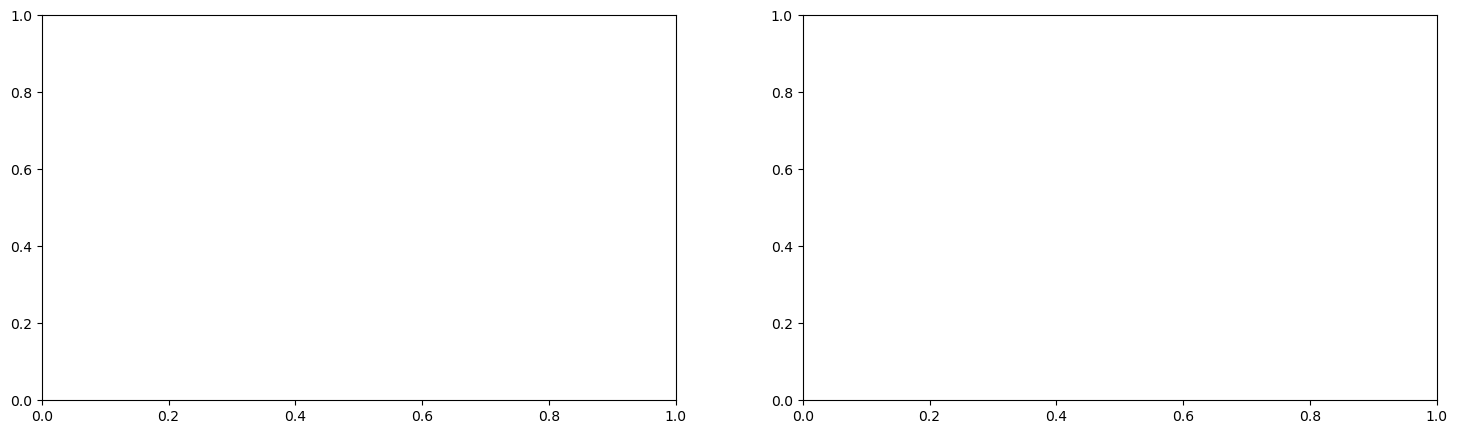

In [7]:
# Edition Analysis

edition_df = df


# Cut up dataframe into chunks by author

all_editions = []
author_total = []
test = []
slope = []
for a_df in all_authors:
    author_name = ""
    alphabetical = a_df["Textbook"].str.split("_").values 
    editions = [] # Get only the edition
    for l in alphabetical:
        editions.append(l[2])
        all_editions.append(l[2])
        author_name = l[0] + "_" + l[1]
        author_total.append(author_name)
    test.append(editions)
    a_df.loc[:,"Edition"] = editions
    a_df.loc[:,"Edition"] = pd.to_numeric(a_df["Edition"])
    a_df = a_df.sort_values("Edition")
    if len(a_df["Edition"]) > 0:
        res = stats.linregress(a_df["Edition"].astype(float), a_df["Score"])
        for l in alphabetical:
            if len(alphabetical) > 1:
                slope.append(res.slope)
            else:
                slope.append(0)

edition_df["Edition"] = all_editions
edition_df["Author"] = author_total
edition_df["Slope"] = slope

# Find consistently positive/negative authors
author_dfs = []
authors = edition_df["Author"].unique()
for author in authors:
    single_author_df = edition_df[edition_df["Author"] == author]
    if single_author_df["Score"].mean() > 1 or single_author_df["Score"].mean() < -1: # if they're consistent, their means will be above or below also
        author_dfs.append(single_author_df)
        
print(author_dfs)

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Break up plot into plot where slopes are negative (<-0.055) and plot where slopes are positive (>0.055)

high = edition_df[edition_df["Slope"] >= 1]
sns.lineplot(ax = axes[0], x="Edition", y="Score", hue="Author", data=high)

low = edition_df[edition_df["Slope"] <= -1]
sns.lineplot(ax = axes[1], x="Edition", y="Score", hue="Author", data=low)

# fig, axes = plt.subplots(1, 2, figsize=(18, 5))



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.3852
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.541
Time:                        20:09:29   Log-Likelihood:                 55.713
No. Observations:                  26   AIC:                            -107.4
Df Residuals:                      24   BIC:                            -104.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9096      1.454     -0.626      0.537      -3.911       2.091
Year           0.0005      0.001      0.621      0.541      -0.001       0.002
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.431
Skew:                          -0.078   Prob(JB):                        0.806
Kurtosis:                       3.611   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

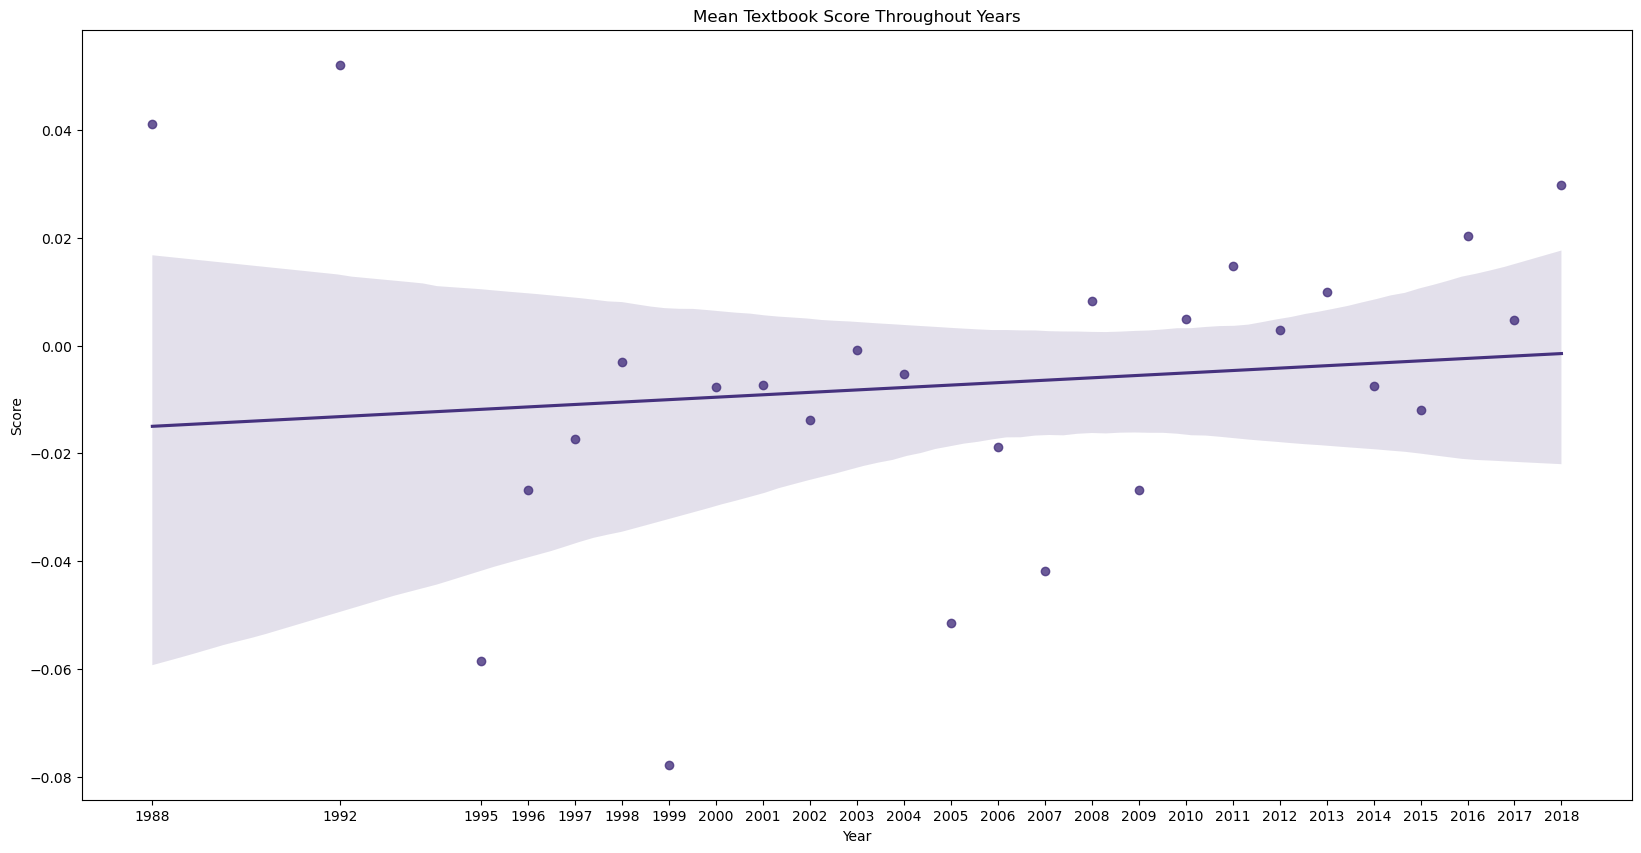

In [8]:
# Year Analysis

year_df = df

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Autism"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year


# Overall mean for each year, for all textbooks

# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books
    

# Find mean of the books in each year

year_scores = {}
for year in year_textbooks:
    book_list = year_textbooks[year]
    scores = []
    for book in book_list:
        # Find the book in the df
        string_to_query = "Textbook=='" + book + "'"
        score = year_df.query(string_to_query)["Score"]
        scores.append(float(score.iloc[0]))
    average = mean(scores)
    year_scores[year] = [year, average]
    
# Graph it

graphing_years = pd.DataFrame.from_dict(year_scores, orient="index", columns=["Year", "Score"])
# graphing_years = graphing_years.reset_index()

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

graphing_years.to_csv('graphing_years_sentiwords_autism.csv', index=True)


# model = sm.OLS(graphing_years["Score"], graphing_years["Year"])
# results = model.fit()
# display(results.summary())
# print(results.summary())
# print(results.params)

res = smf.ols(formula='Score ~ Year', data=graphing_years).fit() # y ~ x
display(res.summary())

fig, ax = plt.subplots(figsize=(20, 10)) 

os.chdir(results_dir)

# sns.lineplot(ax = ax, x="Year", y="Score", data=graphing_years)
sns.regplot(ax = ax, x="Year", y="Score", data=graphing_years);

ax.set_xticks(graphing_years["Year"])
ax.set_title("Mean Textbook Score Throughout Years")
plt.savefig('years_autism_sentiwords.png')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.978
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.177
Time:                        20:09:49   Log-Likelihood:                 50.856
No. Observations:                  20   AIC:                            -97.71
Df Residuals:                      18   BIC:                            -95.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1073      1.491     -1.414      0.174      -5.239       1.024
Year           0.0010      0.001      1.406      0.177      -0.001       0.003
==============================================================================
Omnibus:                        0.429   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.041
Skew:                          -0.110   Prob(JB):                        0.980
Kurtosis:                       2.999   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8723
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.363
Time:                        20:09:50   Log-Likelihood:                 31.603
No. Observations:                  20   AIC:                            -59.21
Df Residuals:                      18   BIC:                            -57.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6514      2.868      0.925      0.367      -3.373       8.676
Year          -0.0013      0.001     -0.934      0.363      -0.004       0.002
==============================================================================
Omnibus:                        1.242   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                0.830
Skew:                          -0.004   Prob(JB):                        0.660
Kurtosis:                       2.002   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.270
Method:                 Least Squares   F-statistic:                    0.1499
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.725
Time:                        20:09:50   Log-Likelihood:                 5.3585
No. Observations:                   5   AIC:                            -6.717
Df Residuals:                       3   BIC:                            -7.498
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1738     41.619      0.389      0.723    -116.275     148.623
Year          -0.0080      0.021     -0.387      0.725      -0.074       0.058
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.172
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.198
Skew:                          -0.126   Prob(JB):                        0.906
Kurtosis:                       2.058   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.562
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.132
Time:                        20:09:51   Log-Likelihood:                 20.499
No. Observations:                  16   AIC:                            -37.00
Df Residuals:                      14   BIC:                            -35.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.5589      7.832     -1.603      0.131     -29.358       4.240
Year           0.0062      0.004      1.601      0.132      -0.002       0.015
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.443
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.517
Skew:                           0.314   Prob(JB):                        0.772
Kurtosis:                       2.382   Cond. No.                     8.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     2.900
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.112
Time:                        20:09:51   Log-Likelihood:                 33.134
No. Observations:                  15   AIC:                            -62.27
Df Residuals:                      13   BIC:                            -60.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8026      2.230     -1.705      0.112      -8.621       1.015
Year           0.0019      0.001      1.703      0.112      -0.001       0.004
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.336
Skew:                          -0.253   Prob(JB):                        0.845
Kurtosis:                       2.469   Cond. No.                     6.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.412
Method:                 Least Squares   F-statistic:                    0.1244
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.758
Time:                        20:09:52   Log-Likelihood:                 8.4646
No. Observations:                   4   AIC:                            -12.93
Df Residuals:                       2   BIC:                            -14.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1180     14.509     -0.353      0.758     -67.546      57.310
Year           0.0025      0.007      0.353      0.758      -0.028       0.034
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.909
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.479
Skew:                           0.709   Prob(JB):                        0.787
Kurtosis:                       2.071   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\maksi\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3.680
Date:                Mon, 01 Apr 2024   Prob (F-statistic):             0.0720
Time:                        20:09:52   Log-Likelihood:                 52.259
No. Observations:                  19   AIC:                            -100.5
Df Residuals:                      17   BIC:                            -98.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2305      1.173     -1.901      0.074      -4.706       0.245
Year           0.0011      0.001      1.918      0.072      -0.000       0.002
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.356
Skew:                           0.295   Prob(JB):                        0.837
Kurtosis:                       2.681   Cond. No.                     6.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

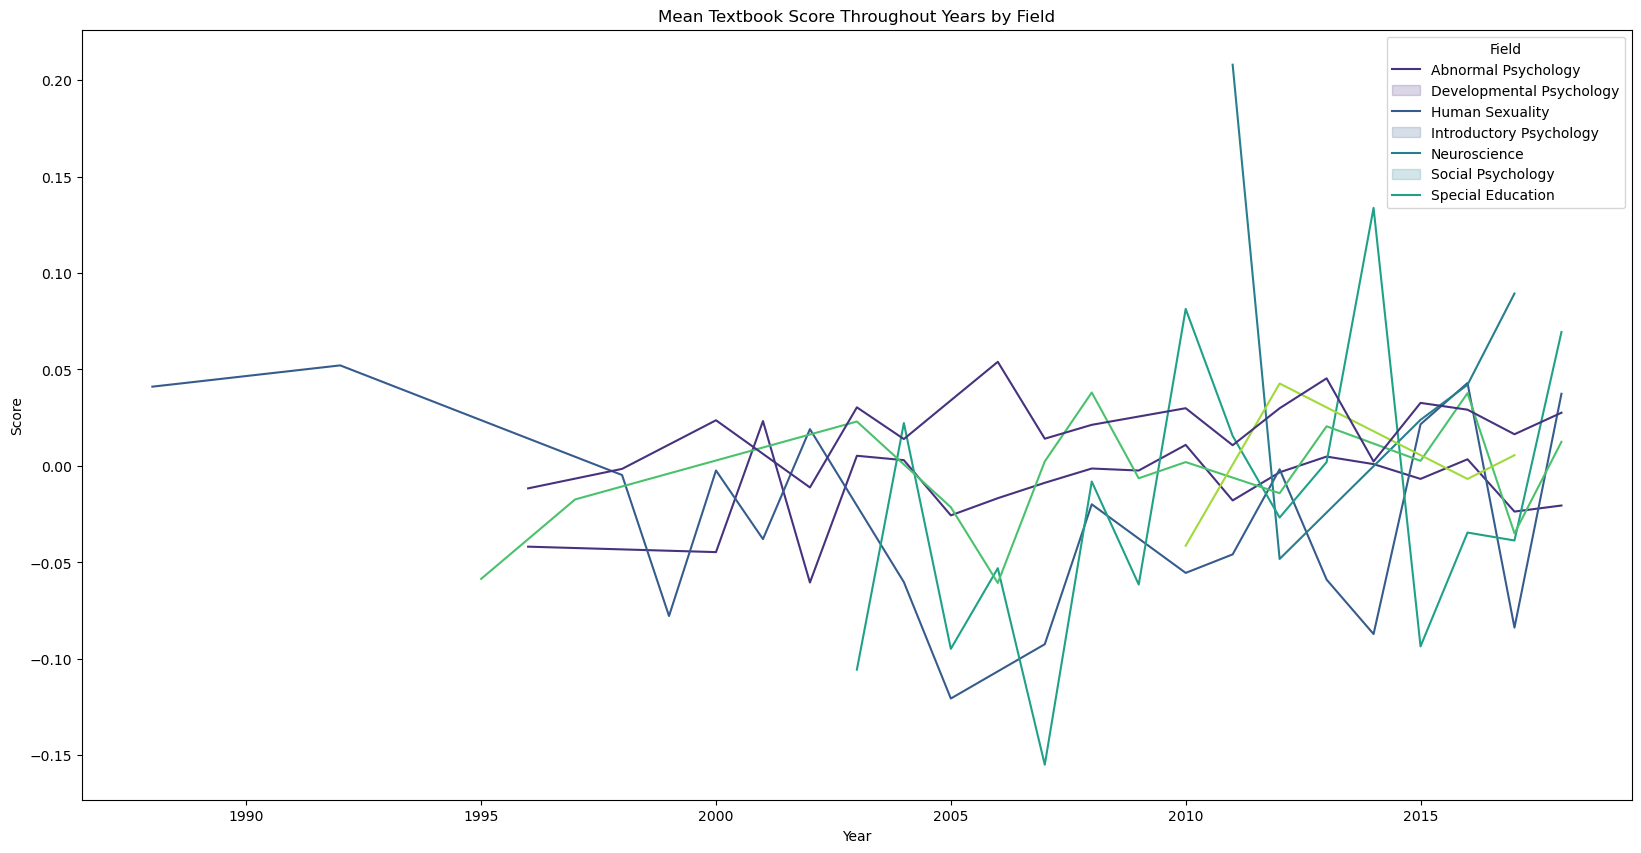

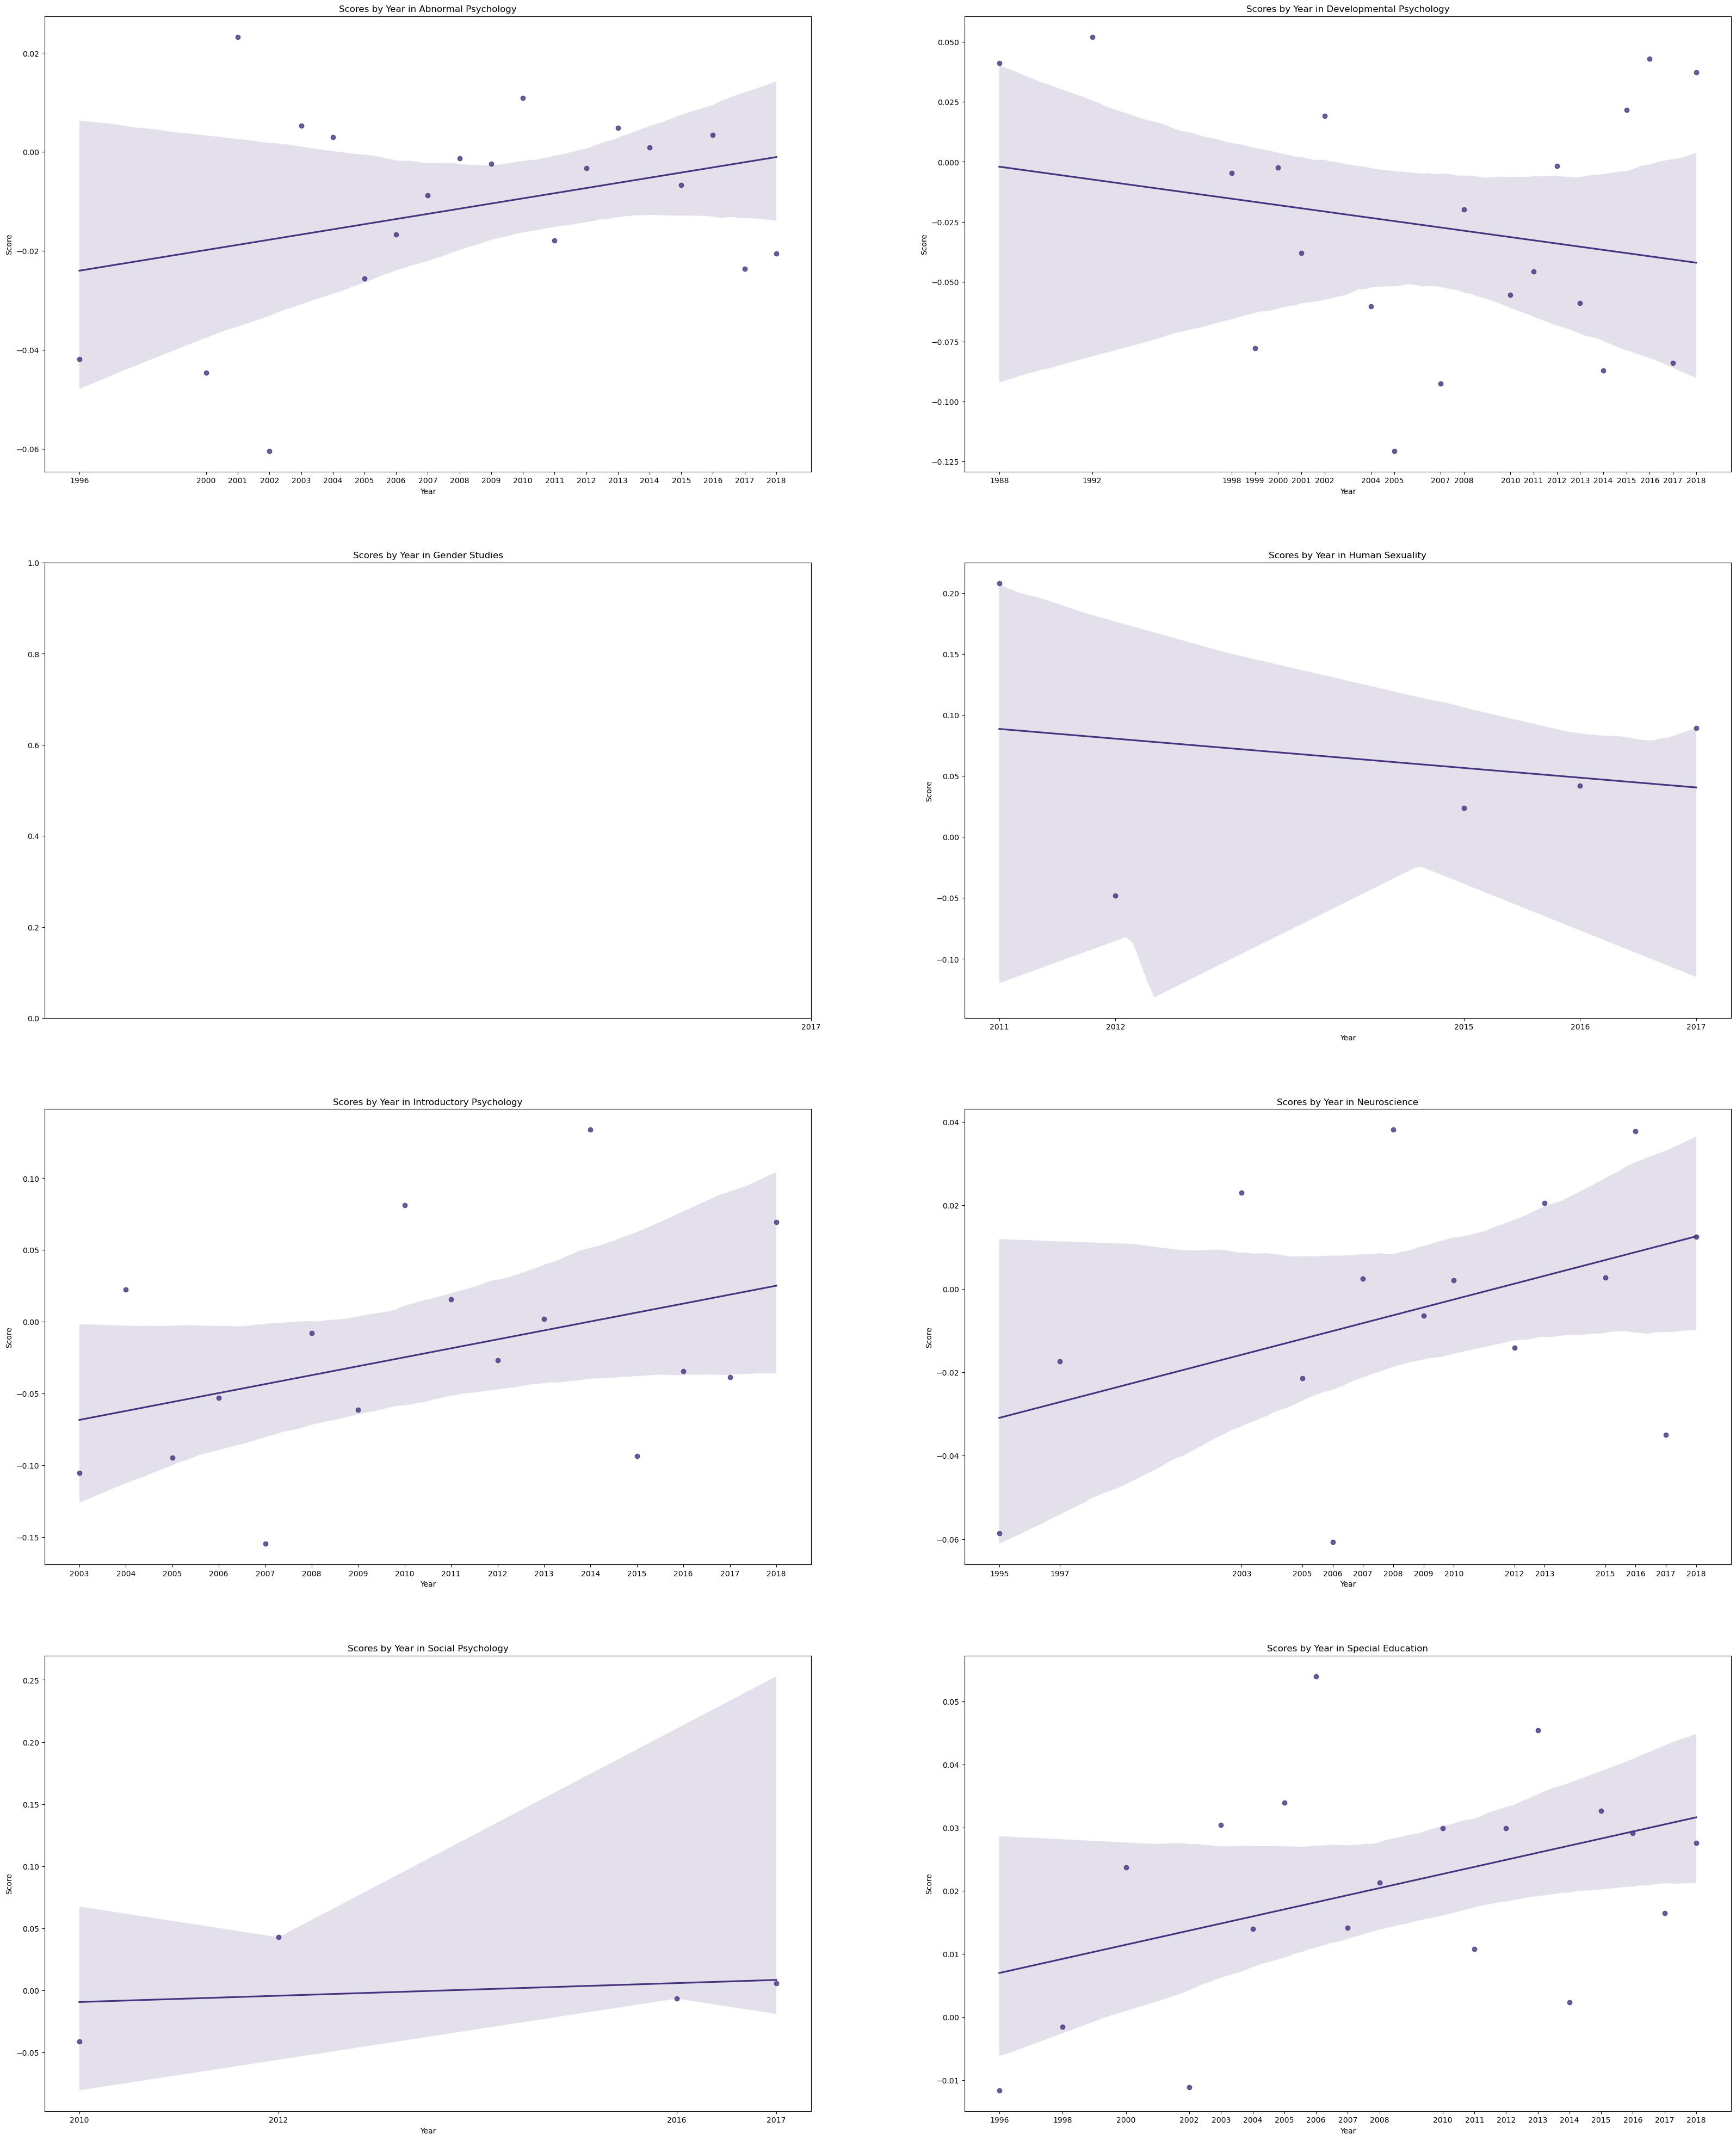

In [9]:
# Years by field

# Year Analysis

year_df = df

# Get a field from the big data frame
def getFieldDF(df, field):
    df1 = df[df['Field'] == field]
    return df1

# Get all the fields
fields = df.Field.unique()

# Make a list where each element is a dataframe with only one field
field_dfs = []
for f in fields:
    f_df = getFieldDF(year_df, f)
    field_dfs.append(f_df)


# print(field_dfs)

# There is a better way to get dates...

textbook_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Textbook_Dump_Autism"

textbooks = os.listdir(textbook_dir)

os.chdir(textbook_dir)

# Function to get full text
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText

# Dictionary filled with years for all the books
book_years = {}
for book in textbooks:
    total_text = getText(book)
    titles = total_text[1]
    no_parentheses = titles[1:len(titles)-1]
    if "," in no_parentheses:
        year = no_parentheses.split(",")[1]
        year = int(year)
        book_years[book] = year
        
# Make new dictionary where year corresponds to a list of textbooks
year_textbooks = {}

# Get all the years
years = []
for book in book_years:
    year = book_years[book]
    if year not in years:
        years.append(year)
years.sort()

# Now, add each year as a key and a list of books as the value
for year in years:
    books = []
    for book in book_years:
        if book_years[book] == year:
            books.append(book)
    year_textbooks[year] = books

def getYear(book_df):

    # Overall mean for each year, for all textbooks in a field

    # Find mean of the books in each year
    year_scores = {}
    for year in year_textbooks:
        book_list = year_textbooks[year]
        scores = []
        for book in book_list:
            # Find the book in the df
            string_to_query = "Textbook=='" + book + "'"
            score = book_df.query(string_to_query)["Score"]
            # If the score exists (that is, if the book is in this dataframe)
            if len(score) > 0:
                scores.append(float(score.iloc[0]))
        if len(scores) > 0:
            average = mean(scores)
            year_scores[year] = [year, average]
    
    return year_scores

# Get the years for each field dataframe
year_scores = []
for f_df in field_dfs:
#     print(f_df)
    year_score = getYear(f_df)
#     print(year_score)
    graphing_years = pd.DataFrame.from_dict(year_score, orient="index", columns=["Year", "Score"])
    graphing_years["Field"] = f_df["Field"].iloc[0] # Include the field
    graphing_years = graphing_years.reset_index()
    year_scores.append(graphing_years)

# Graph it




# print(year_scores)

os.chdir(results_dir)

fig, ax = plt.subplots(figsize=(20, 10)) 

sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[0])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[1])
# sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[2])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[3])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[4])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[5])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[6])
sns.lineplot(ax = ax, x="Year", y="Score", data=year_scores[7])

# ax.set_xticks(book_years.values())
ax.set_title("Mean Textbook Score Throughout Years by Field")

ax.legend(title="Field", labels=["Abnormal Psychology", "Developmental Psychology", "Human Sexuality", 
                                  "Introductory Psychology", "Neuroscience", "Social Psychology", "Special Education"])
plt.savefig('years_autism_sentiwords_fields_all.png')

fig, ax = plt.subplots(4, 2, figsize = (40,50))

sns.regplot(ax = ax[0][0],
    data=year_scores[0], x="Year", y="Score" # abn
)

res = smf.ols(formula='Score ~ Year', data=year_scores[0]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[0]["Score"].tolist(), year_scores[0]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[0][1],
    data=year_scores[1], x="Year", y="Score" # devo
)

# model = sm.OLS(year_scores[1]["Score"].tolist(), year_scores[1]["Year"].tolist())
# results = model.fit()
# display(results.summary())

res = smf.ols(formula='Score ~ Year', data=year_scores[1]).fit() # y ~ x
display(res.summary())

# sns.regplot(ax = ax[1][0],
#     data=year_scores[2], x="Year", y="Score" # gs
# )

# model = sm.OLS(year_scores[2]["Score"].tolist(), year_scores[2]["Year"].tolist())
# results = model.fit()
# print(results.summary())

sns.regplot(ax = ax[1][1],
    data=year_scores[3], x="Year", y="Score" # hs
)

res = smf.ols(formula='Score ~ Year', data=year_scores[3]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[3]["Score"].tolist(), year_scores[3]["Year"].tolist())
# results = model.fit()
# display(results.summary())



sns.regplot(ax = ax[2][0],
    data=year_scores[4], x="Year", y="Score" # intro
)

res = smf.ols(formula='Score ~ Year', data=year_scores[4]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[4]["Score"].tolist(), year_scores[4]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[2][1],
    data=year_scores[5], x="Year", y="Score" # neuro
)

res = smf.ols(formula='Score ~ Year', data=year_scores[5]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[5]["Score"].tolist(), year_scores[5]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[3][0],
    data=year_scores[6], x="Year", y="Score" # socl
)

res = smf.ols(formula='Score ~ Year', data=year_scores[6]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[6]["Score"].tolist(), year_scores[6]["Year"].tolist())
# results = model.fit()
# display(results.summary())

sns.regplot(ax = ax[3][1],
    data=year_scores[7], x="Year", y="Score" # spcl
)

res = smf.ols(formula='Score ~ Year', data=year_scores[7]).fit() # y ~ x
display(res.summary())

# model = sm.OLS(year_scores[7]["Score"].tolist(), year_scores[7]["Year"].tolist())
# results = model.fit()
# display(results.summary())


ax[0][0].set_title("Scores by Year in Abnormal Psychology")
ax[0][0].set_xticks(year_scores[0]["Year"])

ax[0][1].set_title("Scores by Year in Developmental Psychology")
ax[0][1].set_xticks(year_scores[1]["Year"])

ax[1][0].set_title("Scores by Year in Gender Studies")
ax[1][0].set_xticks(year_scores[2]["Year"])

ax[1][1].set_title("Scores by Year in Human Sexuality")
ax[1][1].set_xticks(year_scores[3]["Year"])

ax[2][0].set_title("Scores by Year in Introductory Psychology")
ax[2][0].set_xticks(year_scores[4]["Year"])

ax[2][1].set_title("Scores by Year in Neuroscience")
ax[2][1].set_xticks(year_scores[5]["Year"])

ax[3][0].set_title("Scores by Year in Social Psychology")
ax[3][0].set_xticks(year_scores[6]["Year"])

ax[3][1].set_title("Scores by Year in Special Education")
ax[3][1].set_xticks(year_scores[7]["Year"])

results_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\GitHub_DMP\Results"

results = os.listdir(results_dir)

os.chdir(results_dir)

counter = 0
for year_score in year_scores:
    title = "year_score_autism_sentiwords_" + str(counter) + ".csv"
    graphing_years.to_csv(title, index=True)
    counter += 1


# for f in fields:
for counter in range(4):
    for subcounter in range(2):
        extent = ax[counter][subcounter].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        title = "years_autism_sentiwords_fields" + str(counter) + "_" + str(subcounter) + ".png"
        ax[counter][subcounter].figure.savefig(title, bbox_inches=extent.expanded(1.2, 1.2))
    counter += 1



In [10]:
# # Does length of passage matter?

# os.chdir(textbook_dir)

# # Function to get full text
# def getText(filename):
#     doc = docx.Document(filename)
#     fullText = []
#     for para in doc.paragraphs:
#         fullText.append(para.text)
#     return fullText

# # Dictionary filled with text for all the books, minus the titles
# title_text = {}
# for book in textbooks:
#     total_text = getText(book)
#     text_without_title = total_text[4:]
#     for piece in text_without_title:
#         if piece == '':
#             text_without_title.remove(piece) # Does not get rid of all whitespace, but ah well.
#     title_text[book] = text_without_title
    
    
# # Remove stop words from each book

# stopwords_dir = r"C:\Users\maksi\Documents\UVA\Research\DMP\Stop_Words" 

# os.chdir(stopwords_dir)

# f = open("stop_words_english_original.txt", "r", encoding="utf-8")
# stopwords = []
# for text in f:
#     text = text.replace('\n', '')
#     stopwords.append(text)


# punc = '''!()[]{};:'-"\,<>./?@#$%^&*_~''' # Must include "-" in words... or not?

# # Function to clean up text and remove stopwords
# def clean(book):
#     text_list = title_text[book]
#     new_text_list = []
    
#     # Clean up text
#     for text in text_list:
#         text = text.strip()
#         text = text.lower()
#         text = text.split(' ')
#         new_text_list.append(text)


#     newer_text_list = []
    
#     # Remove punctuation
#     for sentence in new_text_list:
#         for word in sentence:
#             for char in punc:
#                 if char in word:
#                     word = word.replace(char, '')
#             newer_text_list.append(word)
                
#     # Remove stop words
#     newest_text_list = []
#     for words in newer_text_list:
#         if words not in stopwords:
#             newest_text_list.append(words)

#     # Remove blanks
#     for w in newest_text_list:
#         if len(w) == 0:
#             newest_text_list.remove(w)
            
#     return newest_text_list

# # Update all the books with their clean, stopword-less counterparts

# clean_texts = {}
# for book in title_text:
#     newest_text_list = clean(book)
#     clean_texts[book] = newest_text_list
    
# # Find length of all texts
# lengths = {}
# for book in clean_texts:
#     length_of_text = len(clean_texts[book])
#     lengths[book] = length_of_text
    
# print(lengths)



In [11]:
# print(max(lengths.values()))
# print(list(lengths.keys())[list(lengths.values()).index(13131)])

# df["Field"] = df["Author"].apply(lambda x : x.split("_")[0])

In [12]:
# length_df = df

# print(length_df)

# # Add the lengths of the books to the dataframe
# length_df["Length"] = length_df["Textbook"].map(lengths)

# # Correlation between score and length?
# fig, ax = plt.subplots(1, 2, figsize=(15, 8)) 

# sns.scatterplot(ax=ax[0], data=length_df, x="Length", y="Score", hue="Field")
# ax[0].set_title("Length of Textbook vs. Score")

# # Remove special education and abnormal
# secondary_df = length_df[length_df["Field"] != "Spcl"]
# tertiary_df = secondary_df[secondary_df["Field"] != "Abn"]
# sns.scatterplot(ax=ax[1], data=tertiary_df, x="Length", y="Score", hue="Field")
# ax[1].set_title("Length of Textbook vs. Score (Excluding Special Ed. and Abnormal)")

In [13]:
# # Overall

# overall_df = df

# overall_df["Year"] = overall_df["Textbook"].map(book_years)

# fields = []
# for author in overall_df["Author"]:
#     field = author.split("_")[0]
#     fields.append(field)

# overall_df["Field"] = fields

# print(overall_df)

# fig, ax = plt.subplots(figsize=(20,20))

# sns.scatterplot(data=overall_df, x="Year", y="Score", hue="Field")